In [1]:
import numpy as np
import pandas as pd

movies = pd.read_csv('IMDb_movies.csv', dtype={'country': str, 'genre': str})
print(movies.shape)
movies.head()

(85855, 22)


D:\Data\A\Documents\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


imdb_title_id                        title               original_title  \
0     tt0000009                   Miss Jerry                   Miss Jerry   
1     tt0000574  The Story of the Kelly Gang  The Story of the Kelly Gang   
2     tt0001892               Den sorte drøm               Den sorte drøm   
3     tt0002101                    Cleopatra                    Cleopatra   
4     tt0002130                    L'Inferno                    L'Inferno   

   year date_published                      genre  duration           country  \
0  1894     1894-10-09                    Romance        45               USA   
1  1906     1906-12-26    Biography, Crime, Drama        70         Australia   
2  1911     1911-08-19                      Drama        53  Germany, Denmark   
3  1912     1912-11-13             Drama, History       100               USA   
4  1911     1911-03-06  Adventure, Drama, Fantasy        68             Italy   

  language                             director  ...  \
0     None                      Alexander Black  ...   
1     None                         Charles Tait  ...   
2      NaN                            Urban Gad  ...   
3  English                   Charles L. Gaskill  ...   
4  Italian  Francesco Bertolini, Adolfo Padovan  ...   

                                              actors  \
0  Blanche Bayliss, William Courtenay, Chauncey D...   
1  Elizabeth Tait, John Tait, Norman Campbell, Be...   
2  Asta Nielsen, Valdemar Psilander, Gunnar Helse...   
3  Helen Gardner, Pearl Sindelar, Miss Fielding, ...   
4  Salvatore Papa, Arturo Pirovano, Giuseppe de L...   

                                         description avg_vote votes   budget  \
0  The adventures of a female reporter in the 1890s.      5.9   154      NaN   
1  True story of notorious Australian outlaw Ned ...      6.1   589   $ 2250   
2  Two men of high rank are both wooing the beaut...      5.8   188      NaN   
3  The fabled queen of Egypt's affair with Roman ...      5.2   446  $ 45000   
4  Loosely adapted from Dante's Divine Comedy and...      7.0  2237      NaN   

   usa_gross_income worlwide_gross_income metascore reviews_from_users  \
0               NaN                   NaN       NaN                1.0   
1               NaN                   NaN       NaN                7.0   
2               NaN                   NaN       NaN                5.0   
3               NaN                   NaN       NaN               25.0   
4               NaN                   NaN       NaN               31.0   

   reviews_from_critics  
0                   2.0  
1                   7.0  
2                   2.0  
3                   3.0  
4                  14.0  

[5 rows x 22 columns]

In [2]:
movies.describe()

duration      avg_vote         votes     metascore  \
count  85855.000000  85855.000000  8.585500e+04  13305.000000   
mean     100.351418      5.898656  9.493490e+03     55.896881   
std       22.553848      1.234987  5.357436e+04     17.784874   
min       41.000000      1.000000  9.900000e+01      1.000000   
25%       88.000000      5.200000  2.050000e+02     43.000000   
50%       96.000000      6.100000  4.840000e+02     57.000000   
75%      108.000000      6.800000  1.766500e+03     69.000000   
max      808.000000      9.900000  2.278845e+06    100.000000   

       reviews_from_users  reviews_from_critics  
count        78258.000000          74058.000000  
mean            46.040826             27.479989  
std            178.511411             58.339158  
min              1.000000              1.000000  
25%              4.000000              3.000000  
50%              9.000000              8.000000  
75%             27.000000             23.000000  
max          10472.000000            999.000000

In [3]:
movies.dropna(subset=['genre','country','director','avg_vote','budget','usa_gross_income','worlwide_gross_income','metascore'], inplace=True)
movies.drop_duplicates(['title'], inplace=True)
movies = movies.drop(['title','original_title','date_published','duration','language','production_company','description','reviews_from_users','reviews_from_critics'], axis=1)
movies = movies.drop(['writer','actors'], axis=1)

In [4]:
print(movies.shape)
movies.head()


(6590, 11)


imdb_title_id  year                       genre  country  \
506      tt0017136  1927               Drama, Sci-Fi  Germany   
1048     tt0021749  1931      Comedy, Drama, Romance      USA   
2454     tt0027977  1936       Comedy, Drama, Family      USA   
2795     tt0029453  1937       Crime, Drama, Romance   France   
2827     tt0029583  1937  Animation, Family, Fantasy      USA   

                          director  avg_vote   votes       budget  \
506                     Fritz Lang       8.3  156076  DEM 6000000   
1048               Charles Chaplin       8.5  162668    $ 1500000   
2454               Charles Chaplin       8.5  211250    $ 1500000   
2795               Julien Duvivier       7.7    6180      $ 60000   
2827  William Cottrell, David Hand       7.6  177157    $ 1499000   

     usa_gross_income worlwide_gross_income  metascore  
506         $ 1236166             $ 1349711       98.0  
1048          $ 19181               $ 46008       99.0  
2454         $ 163577              $ 457688       96.0  
2795         $ 155895              $ 155895       98.0  
2827      $ 184925486           $ 184925486       95.0

In [5]:
movies['year'] = movies['year'].astype(int)
movies['avg_vote'] = movies['avg_vote'].astype(float)
movies['votes'] = movies['votes'].astype(int)
movies['director'] = movies['director'].astype(str)

In [6]:
movies = movies[movies['year'] >= 1970]
movies.head()

imdb_title_id  year                         genre      country  \
4334      tt0035423  2001      Comedy, Fantasy, Romance          USA   
14260     tt0065134  1970       Adventure, Romance, War  USA, Mexico   
14323     tt0065377  1970       Action, Drama, Thriller          USA   
14340     tt0065421  1970  Animation, Adventure, Comedy          USA   
14357     tt0065462  1970     Action, Adventure, Sci-Fi          USA   

                            director  avg_vote  votes      budget  \
4334                   James Mangold       6.4  77852  $ 48000000   
14260                     Don Siegel       7.0  23223   $ 2500000   
14323  George Seaton, Henry Hathaway       6.6  17068  $ 10000000   
14340            Wolfgang Reitherman       7.1  91085   $ 4000000   
14357                       Ted Post       6.1  41159   $ 3000000   

      usa_gross_income worlwide_gross_income  metascore  
4334        $ 47121859            $ 76019048       44.0  
14260        $ 5050000             $ 5050000       62.0  
14323      $ 100489151           $ 100489151       42.0  
14340       $ 35452658            $ 35459543       66.0  
14357       $ 18999718            $ 18999718       46.0

In [7]:
directors = []
for ii in range(0,len(movies)):
    directors.append(str(movies.iloc[ii]['director']).split(", "))
    
print(directors[:10])

[['James Mangold'], ['Don Siegel'], ['George Seaton', 'Henry Hathaway'], ['Wolfgang Reitherman'], ['Ted Post'], ['Bernardo Bertolucci'], ['Brian G. Hutton'], ['Arthur Penn'], ['Arthur Hiller'], ['Robert Altman']]


In [8]:
import re

movies.loc[:,'genre'] = movies.loc[:,'genre'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
movies.loc[:,'country'] = movies.loc[:,'country'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

directors_LC = []
dump = []
for string in directors:
    for each in string:
        dump.append(str.lower(each))
    directors_LC.append(dump)
    dump = []
    

print(directors_LC[:10])
movies.head()

[['james mangold'], ['don siegel'], ['george seaton', 'henry hathaway'], ['wolfgang reitherman'], ['ted post'], ['bernardo bertolucci'], ['brian g. hutton'], ['arthur penn'], ['arthur hiller'], ['robert altman']]


imdb_title_id  year                       genre     country  \
4334      tt0035423  2001      Comedy Fantasy Romance         USA   
14260     tt0065134  1970       Adventure Romance War  USA Mexico   
14323     tt0065377  1970       Action Drama Thriller         USA   
14340     tt0065421  1970  Animation Adventure Comedy         USA   
14357     tt0065462  1970      Action Adventure SciFi         USA   

                            director  avg_vote  votes      budget  \
4334                   James Mangold       6.4  77852  $ 48000000   
14260                     Don Siegel       7.0  23223   $ 2500000   
14323  George Seaton, Henry Hathaway       6.6  17068  $ 10000000   
14340            Wolfgang Reitherman       7.1  91085   $ 4000000   
14357                       Ted Post       6.1  41159   $ 3000000   

      usa_gross_income worlwide_gross_income  metascore  
4334        $ 47121859            $ 76019048       44.0  
14260        $ 5050000             $ 5050000       62.0  
14323      $ 100489151           $ 100489151       42.0  
14340       $ 35452658            $ 35459543       66.0  
14357       $ 18999718            $ 18999718       46.0

In [9]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

movies.loc[:,'genre'] = movies.loc[:,'genre'].apply(lambda x: lower_case(x))
movies.loc[:,'country'] = movies.loc[:,'country'].apply(lambda x: lower_case(x))
movies.head()

imdb_title_id  year                       genre     country  \
4334      tt0035423  2001      comedy fantasy romance         usa   
14260     tt0065134  1970       adventure romance war  usa mexico   
14323     tt0065377  1970       action drama thriller         usa   
14340     tt0065421  1970  animation adventure comedy         usa   
14357     tt0065462  1970      action adventure scifi         usa   

                            director  avg_vote  votes      budget  \
4334                   James Mangold       6.4  77852  $ 48000000   
14260                     Don Siegel       7.0  23223   $ 2500000   
14323  George Seaton, Henry Hathaway       6.6  17068  $ 10000000   
14340            Wolfgang Reitherman       7.1  91085   $ 4000000   
14357                       Ted Post       6.1  41159   $ 3000000   

      usa_gross_income worlwide_gross_income  metascore  
4334        $ 47121859            $ 76019048       44.0  
14260        $ 5050000             $ 5050000       62.0  
14323      $ 100489151           $ 100489151       42.0  
14340       $ 35452658            $ 35459543       66.0  
14357       $ 18999718            $ 18999718       46.0

In [10]:
genres = []
for ii in range(0,len(movies)):
    genres.append(str(movies.iloc[ii]['genre']).split(" "))
    
countries = []
for i in range(0,len(movies)):
    countries.append(str(movies.iloc[i]['country']).split(" "))

In [11]:
print(genres[:10])
print(countries[:10])
print(directors_LC[:10])
print(movies.shape)

[['comedy', 'fantasy', 'romance'], ['adventure', 'romance', 'war'], ['action', 'drama', 'thriller'], ['animation', 'adventure', 'comedy'], ['action', 'adventure', 'scifi'], ['drama'], ['adventure', 'comedy', 'war'], ['adventure', 'comedy', 'drama'], ['drama', 'romance'], ['comedy', 'drama', 'war']]
[['usa'], ['usa', 'mexico'], ['usa'], ['usa'], ['usa'], ['italy', 'france', 'west', 'germany'], ['usa'], ['usa'], ['usa'], ['usa']]
[['james mangold'], ['don siegel'], ['george seaton', 'henry hathaway'], ['wolfgang reitherman'], ['ted post'], ['bernardo bertolucci'], ['brian g. hutton'], ['arthur penn'], ['arthur hiller'], ['robert altman']]
(6498, 11)


In [12]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(genres)
data = pd.DataFrame(data,columns = te.columns_)

print(data)

      action  adventure  animation  biography  comedy  crime  drama  family  \
0      False      False      False      False    True  False  False   False   
1      False       True      False      False   False  False  False   False   
2       True      False      False      False   False  False   True   False   
3      False       True       True      False    True  False  False   False   
4       True       True      False      False   False  False  False   False   
...      ...        ...        ...        ...     ...    ...    ...     ...   
6493   False      False      False      False    True  False  False   False   
6494   False      False      False      False    True  False   True   False   
6495   False      False      False      False    True  False  False   False   
6496   False      False       True      False   False  False   True    True   
6497   False      False      False       True   False  False   True   False   

      fantasy  history  horror  music  musical  mys

In [13]:
te2 = TransactionEncoder()
data2 = te2.fit_transform(countries)
data2 = pd.DataFrame(data2,columns = te2.columns_)

print(data2)

      afghanistan  africa  algeria    and  angola   arab  arabia  argentina  \
0           False   False    False  False   False  False   False      False   
1           False   False    False  False   False  False   False      False   
2           False   False    False  False   False  False   False      False   
3           False   False    False  False   False  False   False      False   
4           False   False    False  False   False  False   False      False   
...           ...     ...      ...    ...     ...    ...     ...        ...   
6493        False   False    False  False   False  False   False      False   
6494        False   False    False  False   False  False   False      False   
6495        False   False    False  False   False  False   False      False   
6496        False   False    False  False   False  False   False      False   
6497        False   False    False  False   False  False   False      False   

      aruba  australia  ...  union  united  uruguay

In [14]:
te3 = TransactionEncoder()
data3 = te3.fit_transform(directors_LC)
data3 = pd.DataFrame(data3,columns = te3.columns_)

print(data3)

      aaron blaise  aaron fisher  aaron horvath  aaron schneider  \
0            False         False          False            False   
1            False         False          False            False   
2            False         False          False            False   
3            False         False          False            False   
4            False         False          False            False   
...            ...           ...            ...              ...   
6493         False         False          False            False   
6494         False         False          False            False   
6495         False         False          False            False   
6496         False         False          False            False   
6497         False         False          False            False   

      aaron seltzer  aaron sorkin  aaron wilson  aaron woodley  \
0             False         False         False          False   
1             False         False         False    

In [15]:
list(data2.columns)

['afghanistan',
 'africa',
 'algeria',
 'and',
 'angola',
 'arab',
 'arabia',
 'argentina',
 'aruba',
 'australia',
 'austria',
 'bahamas',
 'bahrain',
 'belgium',
 'bhutan',
 'bosnia',
 'botswana',
 'brazil',
 'british',
 'bulgaria',
 'cambodia',
 'canada',
 'cayman',
 'chad',
 'chile',
 'china',
 'colombia',
 'croatia',
 'cyprus',
 'czech',
 'czechoslovakia',
 'denmark',
 'dominican',
 'east',
 'ecuador',
 'egypt',
 'emirates',
 'estonia',
 'finland',
 'france',
 'georgia',
 'germany',
 'ghana',
 'greece',
 'guatemala',
 'haiti',
 'herzegovina',
 'hong',
 'hungary',
 'iceland',
 'india',
 'indonesia',
 'iran',
 'ireland',
 'islands',
 'isle',
 'israel',
 'italy',
 'japan',
 'jordan',
 'kazakhstan',
 'kenya',
 'kong',
 'korea',
 'laos',
 'latvia',
 'lebanon',
 'liechtenstein',
 'lithuania',
 'luxembourg',
 'malaysia',
 'mali',
 'malta',
 'man',
 'mexico',
 'monaco',
 'mongolia',
 'morocco',
 'myanmar',
 'nepal',
 'netherlands',
 'new',
 'nigeria',
 'norway',
 'of',
 'pakistan',
 'pale

In [16]:
data2 = data2.drop(['and','arab','east','islands','isle','kong','new','of','puerto','republic','saudi','south','union','united','west'], axis=1)

In [17]:
movies = movies.reset_index(drop = True)
movies = movies.join(data)
movies = movies.join(data2)
movies = movies.join(data3)
movies.head()

imdb_title_id  year                       genre     country  \
0     tt0035423  2001      comedy fantasy romance         usa   
1     tt0065134  1970       adventure romance war  usa mexico   
2     tt0065377  1970       action drama thriller         usa   
3     tt0065421  1970  animation adventure comedy         usa   
4     tt0065462  1970      action adventure scifi         usa   

                        director  avg_vote  votes      budget  \
0                  James Mangold       6.4  77852  $ 48000000   
1                     Don Siegel       7.0  23223   $ 2500000   
2  George Seaton, Henry Hathaway       6.6  17068  $ 10000000   
3            Wolfgang Reitherman       7.1  91085   $ 4000000   
4                       Ted Post       6.1  41159   $ 3000000   

  usa_gross_income worlwide_gross_income  ...  zhangke jia  ziad doueiri  \
0       $ 47121859            $ 76019048  ...        False         False   
1        $ 5050000             $ 5050000  ...        False         False   
2      $ 100489151           $ 100489151  ...        False         False   
3       $ 35452658            $ 35459543  ...        False         False   
4       $ 18999718            $ 18999718  ...        False         False   

   zoe r. cassavetes  ágnes hranitzky  álex de la iglesia  élie chouraqui  \
0              False            False               False           False   
1              False            False               False           False   
2              False            False               False           False   
3              False            False               False           False   
4              False            False               False           False   

   émile gaudreault  éric rohmer  éric toledano  éric warin  
0             False        False          False       False  
1             False        False          False       False  
2             False        False          False       False  
3             False        False          False       False  
4             False        False          False       False  

[5 rows x 3156 columns]

In [18]:
movies = movies.drop(['genre','country','director','budget','usa_gross_income','worlwide_gross_income'], axis=1)
movies.head()

imdb_title_id  year  avg_vote  votes  metascore  action  adventure  \
0     tt0035423  2001       6.4  77852       44.0   False      False   
1     tt0065134  1970       7.0  23223       62.0   False       True   
2     tt0065377  1970       6.6  17068       42.0    True      False   
3     tt0065421  1970       7.1  91085       66.0   False       True   
4     tt0065462  1970       6.1  41159       46.0    True       True   

   animation  biography  comedy  ...  zhangke jia  ziad doueiri  \
0      False      False    True  ...        False         False   
1      False      False   False  ...        False         False   
2      False      False   False  ...        False         False   
3       True      False    True  ...        False         False   
4      False      False   False  ...        False         False   

   zoe r. cassavetes  ágnes hranitzky  álex de la iglesia  élie chouraqui  \
0              False            False               False           False   
1              False            False               False           False   
2              False            False               False           False   
3              False            False               False           False   
4              False            False               False           False   

   émile gaudreault  éric rohmer  éric toledano  éric warin  
0             False        False          False       False  
1             False        False          False       False  
2             False        False          False       False  
3             False        False          False       False  
4             False        False          False       False  

[5 rows x 3150 columns]

In [19]:
#movies = movies.sort_values('year', ascending = False)
#movies.head(20)

In [20]:
#eur = movies[movies['budget'].str.contains("EUR")]
#eur.loc[:,'budget'] = eur.loc[:,'budget'].apply(lambda x: re.sub('[^0-9\s]','',x))
#eur.head()


In [21]:
from sklearn.tree import DecisionTreeRegressor
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

movies_train, movies_test = train_test_split(movies, test_size=0.3, random_state=42)

print("usd_train size:", len(movies_train))
print("usd_test size:", len(movies_test), "\n")

usd_train size: 4548
usd_test size: 1950 



In [22]:
movies_labels1 = movies_train['avg_vote']
movies_labels2 = movies_test['avg_vote']
print(movies_labels1.shape)
print(movies_labels2.shape)

(4548,)
(1950,)


In [23]:
movies_train = movies_train.drop(['avg_vote','imdb_title_id'], axis=1)
movies_test = movies_test.drop(['avg_vote','imdb_title_id'], axis=1)
movies_train.head()

year   votes  metascore  action  adventure  animation  biography  \
3758  2006    1215       41.0   False      False      False      False   
5879  2017    3416       34.0   False      False      False      False   
4907  2013  412102       82.0   False       True      False       True   
5198  2012   65405       55.0   False      False      False      False   
4733  2013  581167       70.0   False      False      False      False   

      comedy  crime  drama  ...  zhangke jia  ziad doueiri  zoe r. cassavetes  \
3758   False  False   True  ...        False         False              False   
5879   False  False   True  ...        False         False              False   
4907   False   True  False  ...        False         False              False   
5198    True  False   True  ...        False         False              False   
4733   False   True   True  ...        False         False              False   

      ágnes hranitzky  álex de la iglesia  élie chouraqui  émile gaudreault  \
3758            False               False           False             False   
5879            False               False           False             False   
4907            False               False           False             False   
5198            False               False           False             False   
4733            False               False           False             False   

      éric rohmer  éric toledano  éric warin  
3758        False          False       False  
5879        False          False       False  
4907        False          False       False  
5198        False          False       False  
4733        False          False       False  

[5 rows x 3148 columns]

In [24]:
movies_train.dtypes

year                  int32
votes                 int32
metascore           float64
action                 bool
adventure              bool
                     ...   
élie chouraqui         bool
émile gaudreault       bool
éric rohmer            bool
éric toledano          bool
éric warin             bool
Length: 3148, dtype: object

In [25]:
movies_train = movies_train.reset_index(drop = True)
movies_test = movies_test.reset_index(drop = True)
movies_labels1 = movies_labels1.reset_index(drop = True)
movies_labels2 = movies_labels2.reset_index(drop = True)

In [44]:
#clf_tree = DecisionTreeRegressor()
#clf_tree = DecisionTreeRegressor(criterion='friedman_mse')
clf_tree = DecisionTreeRegressor(criterion='mae', max_depth=9, max_features=2041)
clf_tree.fit(movies_train, movies_labels1)
pred = clf_tree.predict(movies_test)
print(pred)
print(movies_labels2)

[6.1 5.5 7.3 ... 5.9 6.1 6.8]
0       6.5
1       4.6
2       6.9
3       6.7
4       6.6
       ... 
1945    7.1
1946    6.8
1947    6.6
1948    6.5
1949    7.3
Name: avg_vote, Length: 1950, dtype: float64


In [45]:
conf = np.zeros(1950)
y = movies_labels2 - pred
y = abs(y)
y = y.reset_index(drop = True)

for i in range(1950):
    if y[i]<0.5 or y[i]==0.5:
        conf[i] = 1
        
print(y)
print(conf)
test = np.ones(1950)
print(test)

0       0.4
1       0.9
2       0.4
3       0.1
4       0.4
       ... 
1945    0.3
1946    0.1
1947    0.7
1948    0.4
1949    0.5
Name: avg_vote, Length: 1950, dtype: float64
[1. 0. 1. ... 0. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(conf,test)))
print('F1 score: {}'.format(f1_score(conf,test)))

Accuracy score: 0.7020512820512821
F1 score: 0.8249472732750829


In [29]:
X_train = movies_train
X_test = movies_test
y_train = movies_labels1
y_test = movies_labels2

In [30]:
# acc = np.zeros([315,2])
# index = -1

# for f in range(1,3148,10):
#     index = index+1
#     tree = DecisionTreeRegressor(criterion='mae', max_depth=9, max_features=f)

#     tree.fit(X_train, y_train)
#     tree_pred_test = tree.predict(X_test)
#     tree_pred_train = tree.predict(X_train)

#     ctrain = np.zeros(4548)
#     x = y_train - tree_pred_train
#     x = abs(x)
#     x = x.reset_index(drop = True)
#     for i in range(4548):
#         if x[i]<0.5 or x[i]==0.5:
#             ctrain[i] = 1
#     train1 = np.ones(4548)

#     ctest = np.zeros(1950)
#     y = y_test - tree_pred_test
#     y = abs(y)
#     y = y.reset_index(drop = True)
#     for i in range(1950):
#         if y[i]<0.5 or y[i]==0.5:
#             ctest[i] = 1
#     test1 = np.ones(1950)

#     acc[index,0] = accuracy_score(ctrain, train1)
#     acc[index,1] = accuracy_score(ctest, test1)
    
#     print (f" Train accuracy for f={index} is {acc[index,0]}, while test accuracy is {acc[index,1]}")

 Train accuracy for f=0 is 0.46394019349164467, while test accuracy is 0.45897435897435895
 Train accuracy for f=1 is 0.46613896218117856, while test accuracy is 0.4594871794871795
 Train accuracy for f=2 is 0.47383465259454705, while test accuracy is 0.46974358974358976
 Train accuracy for f=3 is 0.4694371152154793, while test accuracy is 0.46307692307692305
 Train accuracy for f=4 is 0.4687774846086192, while test accuracy is 0.45897435897435895
 Train accuracy for f=5 is 0.4788918205804749, while test accuracy is 0.4676923076923077
 Train accuracy for f=6 is 0.48658751099384345, while test accuracy is 0.4682051282051282
 Train accuracy for f=7 is 0.4793315743183817, while test accuracy is 0.4641025641025641
 Train accuracy for f=8 is 0.48328935795954264, while test accuracy is 0.4625641025641026
 Train accuracy for f=9 is 0.4758135444151275, while test accuracy is 0.45692307692307693
 Train accuracy for f=10 is 0.5406772207563765, while test accuracy is 0.5056410256410256
 Train acc

 Train accuracy for f=92 is 0.7464819700967458, while test accuracy is 0.6697435897435897
 Train accuracy for f=93 is 0.7194371152154794, while test accuracy is 0.6553846153846153
 Train accuracy for f=94 is 0.7493403693931399, while test accuracy is 0.6676923076923077
 Train accuracy for f=95 is 0.7328496042216359, while test accuracy is 0.6697435897435897
 Train accuracy for f=96 is 0.7165787159190853, while test accuracy is 0.6441025641025641
 Train accuracy for f=97 is 0.7172383465259454, while test accuracy is 0.6482051282051282
 Train accuracy for f=98 is 0.7515391380826737, while test accuracy is 0.6728205128205128
 Train accuracy for f=99 is 0.7587950747581355, while test accuracy is 0.681025641025641
 Train accuracy for f=100 is 0.7445030782761654, while test accuracy is 0.6733333333333333
 Train accuracy for f=101 is 0.7449428320140721, while test accuracy is 0.6779487179487179
 Train accuracy for f=102 is 0.7196569920844327, while test accuracy is 0.68
 Train accuracy for f=

 Train accuracy for f=183 is 0.7730870712401056, while test accuracy is 0.6728205128205128
 Train accuracy for f=184 is 0.7774846086191732, while test accuracy is 0.676923076923077
 Train accuracy for f=185 is 0.776165347405453, while test accuracy is 0.6851282051282052
 Train accuracy for f=186 is 0.7695690413368513, while test accuracy is 0.6917948717948718
 Train accuracy for f=187 is 0.7638522427440633, while test accuracy is 0.6964102564102564
 Train accuracy for f=188 is 0.7772647317502199, while test accuracy is 0.6917948717948718
 Train accuracy for f=189 is 0.7675901495162709, while test accuracy is 0.6851282051282052
 Train accuracy for f=190 is 0.7691292875989446, while test accuracy is 0.696923076923077
 Train accuracy for f=191 is 0.7744063324538258, while test accuracy is 0.6928205128205128
 Train accuracy for f=192 is 0.771108179419525, while test accuracy is 0.6958974358974359
 Train accuracy for f=193 is 0.7856200527704486, while test accuracy is 0.6892307692307692
 Tr

 Train accuracy for f=274 is 0.7827616534740546, while test accuracy is 0.6933333333333334
 Train accuracy for f=275 is 0.785839929639402, while test accuracy is 0.6841025641025641
 Train accuracy for f=276 is 0.7785839929639402, while test accuracy is 0.6897435897435897
 Train accuracy for f=277 is 0.7882585751978892, while test accuracy is 0.6861538461538461
 Train accuracy for f=278 is 0.7882585751978892, while test accuracy is 0.6912820512820513
 Train accuracy for f=279 is 0.7889182058047494, while test accuracy is 0.6912820512820513
 Train accuracy for f=280 is 0.7895778364116095, while test accuracy is 0.6943589743589743
 Train accuracy for f=281 is 0.7851802990325418, while test accuracy is 0.6938461538461539
 Train accuracy for f=282 is 0.7878188214599824, while test accuracy is 0.6964102564102564
 Train accuracy for f=283 is 0.7884784520668425, while test accuracy is 0.6882051282051282
 Train accuracy for f=284 is 0.7913368513632366, while test accuracy is 0.7025641025641025


NameError: name 'd' is not defined

In [31]:
# [train,test] = np.argmax(acc,axis=0)
# print (f" Max train: Train accuracy for d=9 and f={train+1} is {acc[train,0]}, while test accuracy is {acc[train,1]}")
# print (f" Max test: Train accuracy for d=9 and f={test+1} is {acc[test,0]}, while test accuracy is {acc[test,1]}")

 Max train: Train accuracy for d=9 and f=271 is 0.7948548812664907, while test accuracy is 0.6907692307692308
 Max test: Train accuracy for d=9 and f=240 is 0.7796833773087071, while test accuracy is 0.7097435897435898


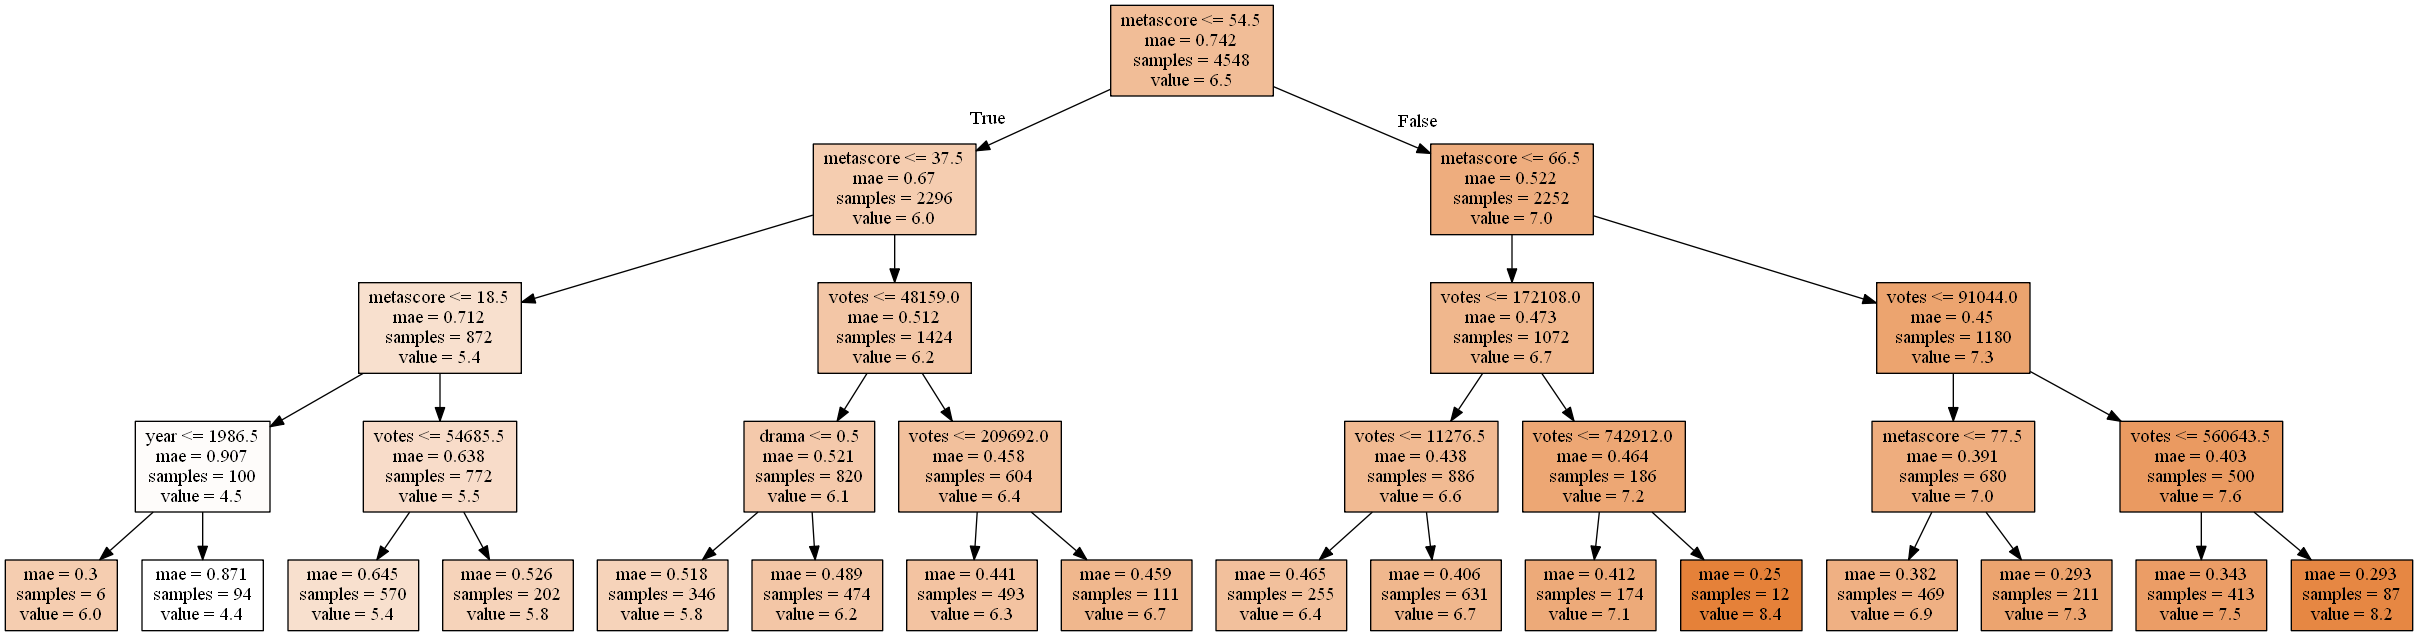

In [55]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

# Let’s write an auxiliary function that will return grid for further visualization.

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


#For Assignment you have to change max_depth parameter and re-run the cell 

clf_tree = DecisionTreeRegressor(criterion='mae', max_depth=4)

# training the tree
clf_tree.fit(X_train, y_train)

tree_graph_to_png(tree=clf_tree, feature_names=X_train.columns, png_file_to_save='decision_tree3.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "decision_tree3.png"
Image(filename = PATH , width=900, height=600)

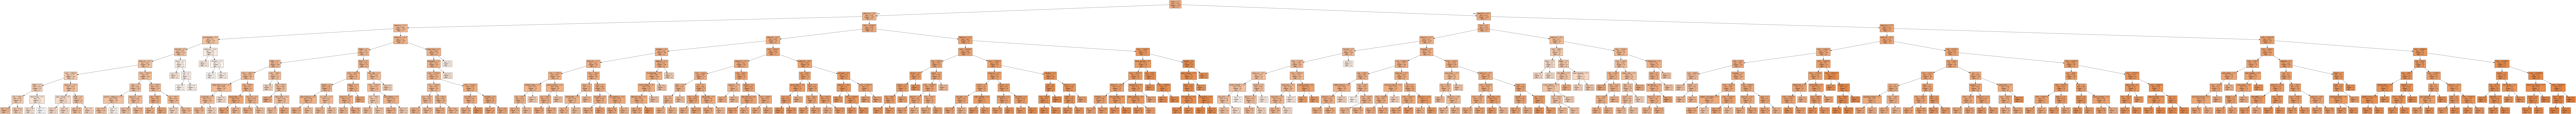

In [51]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "decision_tree1.png"
Image(filename = PATH , width=900, height=600)

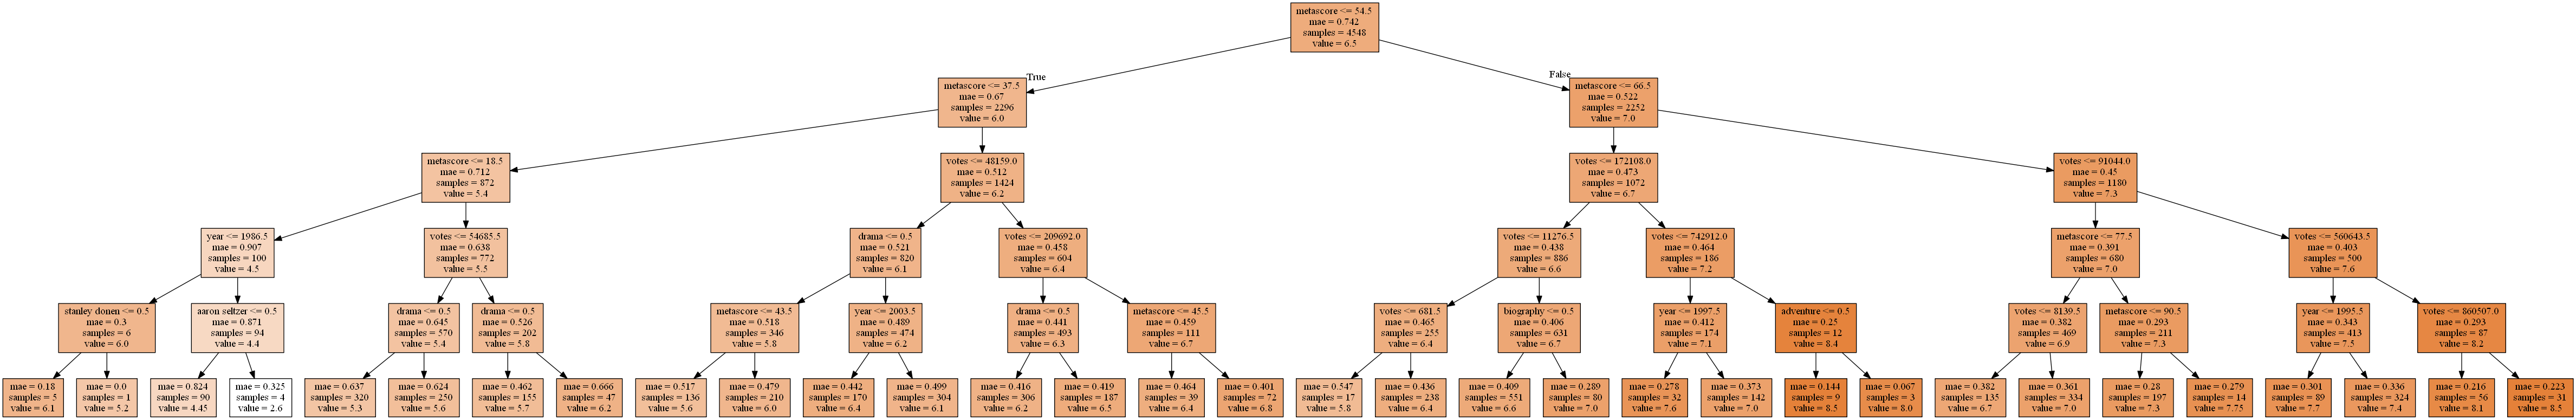

In [54]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "decision_tree2.png"
Image(filename = PATH , width=900, height=600)

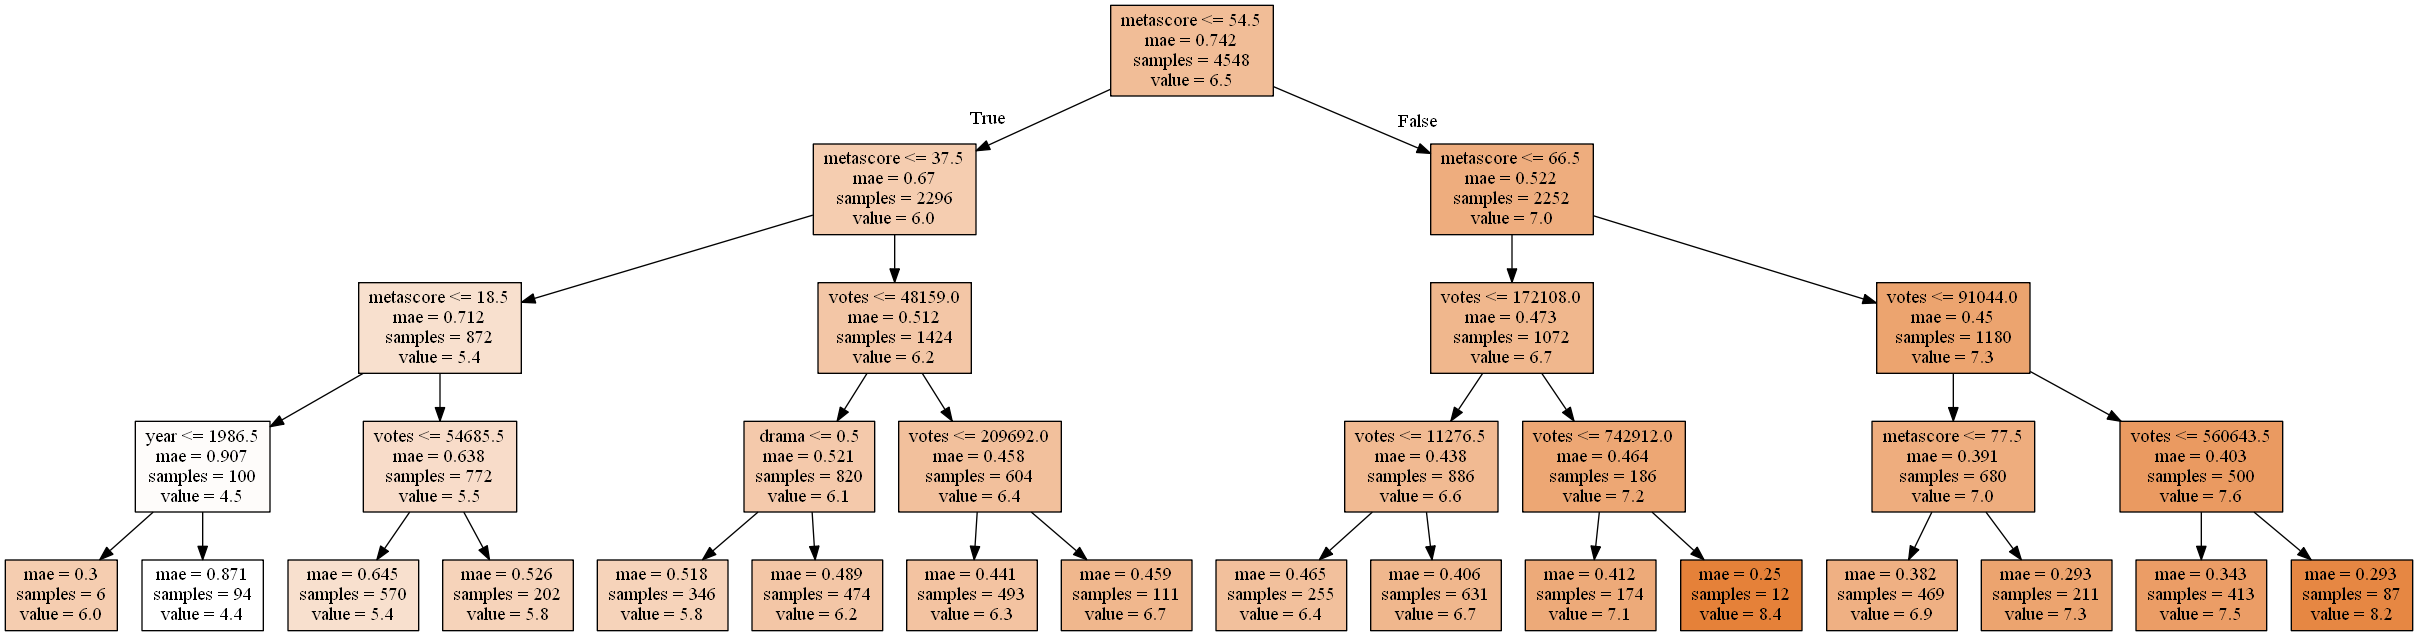

In [56]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "decision_tree3.png"
Image(filename = PATH , width=900, height=600)